In [4]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set(style="white")

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
# plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Basic ploting
## Generate coordinate vectors

In [5]:
nx, ny = 100, 100
x = np.linspace(-5, 5, nx)
y = np.linspace(-5, 5, ny)

## Generate coordinate matrices

In [6]:
xx, yy = np.meshgrid(x, y, sparse=True)

## Compute function value

In [7]:
z = np.sin(xx**2 + yy**2) / (xx**2 + yy**2)

## Plot contours

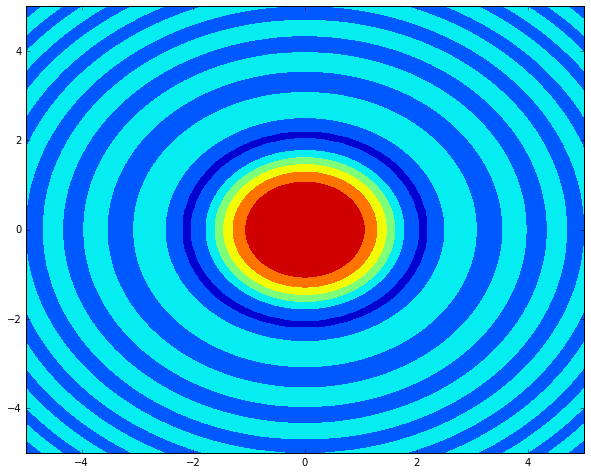

In [8]:
# filled contour
plt.contourf(x, y, z)

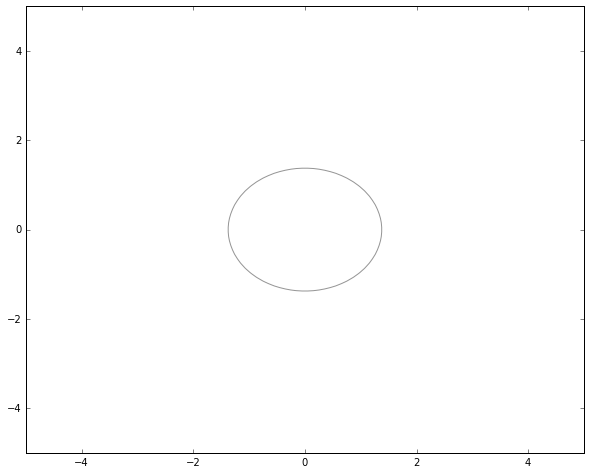

In [9]:
# unfilled contour
plt.contour(x, y, z, levels=[0.5], cmap='Greys', vmin=0, vmax=1.)

# Plot Decision Boundary
First, generate the data and fit the classifier to the training set

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

X, y = make_classification(200, 2, 2, 0, weights=[.5, .5], random_state=15)
clf = LogisticRegression().fit(X[:100], y[:100])

Next, make a continuous grid of values and evaluate the probability of each (x, y) point in the grid:

In [11]:
xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

Now, plot the probability grid as a contour map and additionally show the test set samples on top of it:

[(-5, 5),
 (-5, 5),
 None]

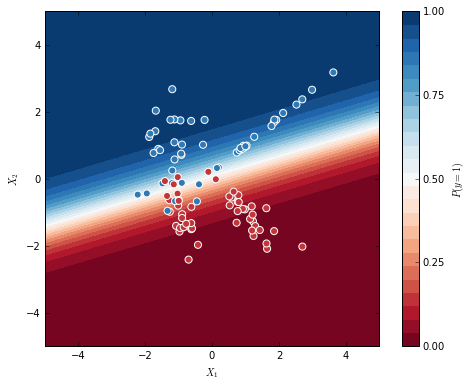

In [12]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")

The logistic regression lets your classify new samples based on any threshold you want, so it doesn't inherently have one "decision boundary." But, of course, a common decision rule to use is $p = .5$. We can also just draw that contour level using the above code:



[(-5, 5),
 (-5, 5),
 None]

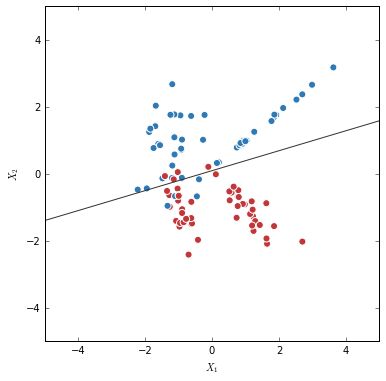

In [13]:
f, ax = plt.subplots(figsize=(8, 6))
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="$X_1$", ylabel="$X_2$")